## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)


Final test score = 0.7497
Metric = Recall

<!-- BEGIN QUESTION -->

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Classifiers and regressors
from sklearn.dummy import DummyClassifier, DummyRegressor

# Preprocessing and pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline

# train test split and cross validation
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

Estimating whether a person will default in next payment, suggesting "default.payment.next.month" is a binary variable. Possible model for analysis could be logistic regression, tree classification and SVMs etc. After reviewing the distribution of variables, I believe there exhibit class imbalance on target variable exists as majority of users (average = 0.22 in target variable) would not default. I also noticed age and amount of credit given are right-skewed.

After reading variable description, I believe repayment status variable across months are strong predictors for default payment as people who were previously delay are likely to default in next month. Also, the difference between amount of previous payment and bill amount of that month (t-1) is also an early indicator of people who are unable to repay bill in full, potentially triggering default in next cycle.

Regarding data cleaning, valued as 0 in Education and Marriage has to drop as it is not specify in kaggle. However, repayment status that is equal to -2 or 0 are referring to no consumption and repay with less than balance due, therefore, we would keep these. After that, I would change value of 6 in education into 5 to reflect the same "Unknown" group, preparing for one-hot transformation in the future. I grouped balance, age, bill payment into numerical features, while sex, education, marriage, repayment status and target variable into categorical features.

In [3]:
cardData = pd.read_csv("data/UCI_Credit_Card.csv")
cardData.rename(columns={"PAY_0" : "RepayStat_Sep", "PAY_2" : "RepayStat_Aug", "PAY_3" : "RepayStat_Jul", "PAY_4" : "RepayStat_Jun", "PAY_5" : "RepayStat_May","PAY_6" : "RepayStat_Apr", "BILL_AMT1" : "Bill_Sep", "BILL_AMT2" : "Bill_Aug", "BILL_AMT3" : "Bill_Jul",  "BILL_AMT4" : "Bill_Jun",  "BILL_AMT5" : "Bill_May", "BILL_AMT6" : "Bill_Apr", "PAY_AMT1" : "Repay_Sep", "PAY_AMT2" : "Repay_Aug", "PAY_AMT3" : "Repay_Jul", "PAY_AMT4" : "Repay_Jun", "PAY_AMT5" : "Repay_May", "PAY_AMT6" : "Repay_Apr", "default.payment.next.month": "DefRepayNext"}, inplace=True)

#Data Integrity before splitting (those value not specify in the description or solve conflict in description)

#drop education == 0 and group education == 5 and education == 6
cardData = cardData[cardData["EDUCATION"] != 0]
cardData["EDUCATION"] = cardData["EDUCATION"].replace(6, 5)

#drop marriage == 0
cardData = cardData[cardData["MARRIAGE"] != 0]

#do not drop repay status == -2 or repay status == 0

cardData.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,RepayStat_Sep,RepayStat_Aug,RepayStat_Jul,RepayStat_Jun,...,Bill_Jun,Bill_May,Bill_Apr,Repay_Sep,Repay_Aug,Repay_Jul,Repay_Jun,Repay_May,Repay_Apr,DefRepayNext
count,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,...,29932.000000,29932.00000,29932.000000,29932.000000,2.993200e+04,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000
mean,14998.159428,167523.375651,1.603568,1.850695,1.554590,35.479721,-0.016203,-0.133235,-0.165776,-0.220099,...,43320.699452,40367.54861,38927.267072,5659.603034,5.923502e+03,5226.158760,4830.180075,4805.269310,5221.906421,0.221535
std,8660.079085,129821.209970,0.489164,0.781022,0.518277,9.219044,1.123450,1.196990,1.196386,1.168849,...,64385.857098,60845.48775,59601.231051,16555.874642,2.306020e+04,17620.773728,15680.849676,15294.066811,17795.285035,0.415287
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.00000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2339.750000,1772.75000,1261.000000,1000.000000,8.360000e+02,390.000000,298.000000,255.000000,122.000000,0.000000
50%,14994.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19068.500000,18125.50000,17111.500000,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22495.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54613.250000,50253.50000,49260.250000,5006.000000,5.000000e+03,4507.250000,4015.000000,4040.250000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,5.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.00000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
X = cardData.drop(columns = {"ID", "DefRepayNext"})
y = cardData["DefRepayNext"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20952 entries, 15615 to 20008
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LIMIT_BAL      20952 non-null  float64
 1   SEX            20952 non-null  int64  
 2   EDUCATION      20952 non-null  int64  
 3   MARRIAGE       20952 non-null  int64  
 4   AGE            20952 non-null  int64  
 5   RepayStat_Sep  20952 non-null  int64  
 6   RepayStat_Aug  20952 non-null  int64  
 7   RepayStat_Jul  20952 non-null  int64  
 8   RepayStat_Jun  20952 non-null  int64  
 9   RepayStat_May  20952 non-null  int64  
 10  RepayStat_Apr  20952 non-null  int64  
 11  Bill_Sep       20952 non-null  float64
 12  Bill_Aug       20952 non-null  float64
 13  Bill_Jul       20952 non-null  float64
 14  Bill_Jun       20952 non-null  float64
 15  Bill_May       20952 non-null  float64
 16  Bill_Apr       20952 non-null  float64
 17  Repay_Sep      20952 non-null  float64
 18  Repay_A

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20952 entries, 15615 to 20008
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LIMIT_BAL      20952 non-null  float64
 1   SEX            20952 non-null  int64  
 2   EDUCATION      20952 non-null  int64  
 3   MARRIAGE       20952 non-null  int64  
 4   AGE            20952 non-null  int64  
 5   RepayStat_Sep  20952 non-null  int64  
 6   RepayStat_Aug  20952 non-null  int64  
 7   RepayStat_Jul  20952 non-null  int64  
 8   RepayStat_Jun  20952 non-null  int64  
 9   RepayStat_May  20952 non-null  int64  
 10  RepayStat_Apr  20952 non-null  int64  
 11  Bill_Sep       20952 non-null  float64
 12  Bill_Aug       20952 non-null  float64
 13  Bill_Jul       20952 non-null  float64
 14  Bill_Jun       20952 non-null  float64
 15  Bill_May       20952 non-null  float64
 16  Bill_Apr       20952 non-null  float64
 17  Repay_Sep      20952 non-null  float64
 18  Repay_A

In [6]:
# Combine X_train and y_train for summary statistics
Xy_train = X_train.copy()
Xy_train["Default Payment Next Month"] = y_train  

# Reshape
df_long = pd.melt(Xy_train, var_name="Features / Target", value_name="Value")

# Group by 
summary_stats = df_long.groupby(["Features / Target"])["Value"].agg(["count", "mean", "std"])

# Round to 2 decimal places
summary_stats = summary_stats.round(2)
summary_stats


,count,mean,std
Features / Target,,,
AGE,20952,35.49,9.21
Bill_Apr,20952,38802.65,59818.10
Bill_Aug,20952,49044.53,71167.76
Bill_Jul,20952,46978.82,69826.10
Bill_Jun,20952,43186.02,64278.14
Bill_May,20952,40190.91,60879.51
Bill_Sep,20952,50992.50,73361.05
Default Payment Next Month,20952,0.22,0.42
EDUCATION,20952,1.85,0.78


Summary 1 : The average value of repayment status from April to September are all less than 0, suggesting most people have made their repayment on time over the period. The Default Repayment Next Month binary variable has a average of 0.22, suggesting 22% people default repayment next month (in October). Since the target variable are biased toward non-default repayment, we are experiencing class imbalance in this dataset.

In [7]:

# Calculate correlation for all features, excluding 'ID'
correlation = Xy_train.corr()

# Get correlation with 'DefRepayNext' and sort the values in descending order
correlation_with_defrepaynext = correlation["Default Payment Next Month"].sort_values(ascending=False)

# Convert to DataFrame
correlation_with_defrepaynext_df = correlation_with_defrepaynext.to_frame(name="Correlation with Default Payment Next Month").round(2)

correlation_with_defrepaynext_df

,Correlation with Default Payment Next Month
Default Payment Next Month,1.00
RepayStat_Sep,0.32
RepayStat_Aug,0.26
RepayStat_Jul,0.24
RepayStat_Jun,0.22
RepayStat_May,0.21
RepayStat_Apr,0.19
EDUCATION,0.03
AGE,0.02
Bill_Apr,-0.01


Summary 2: As expected, after running correlation between target variable and features, all period of Repaymanet status have positive coefficient while education and age has a small positive effect on target. For negative territory, bill payment of all period, gender, repayment amount and balance exhibit negative relationship with target variable

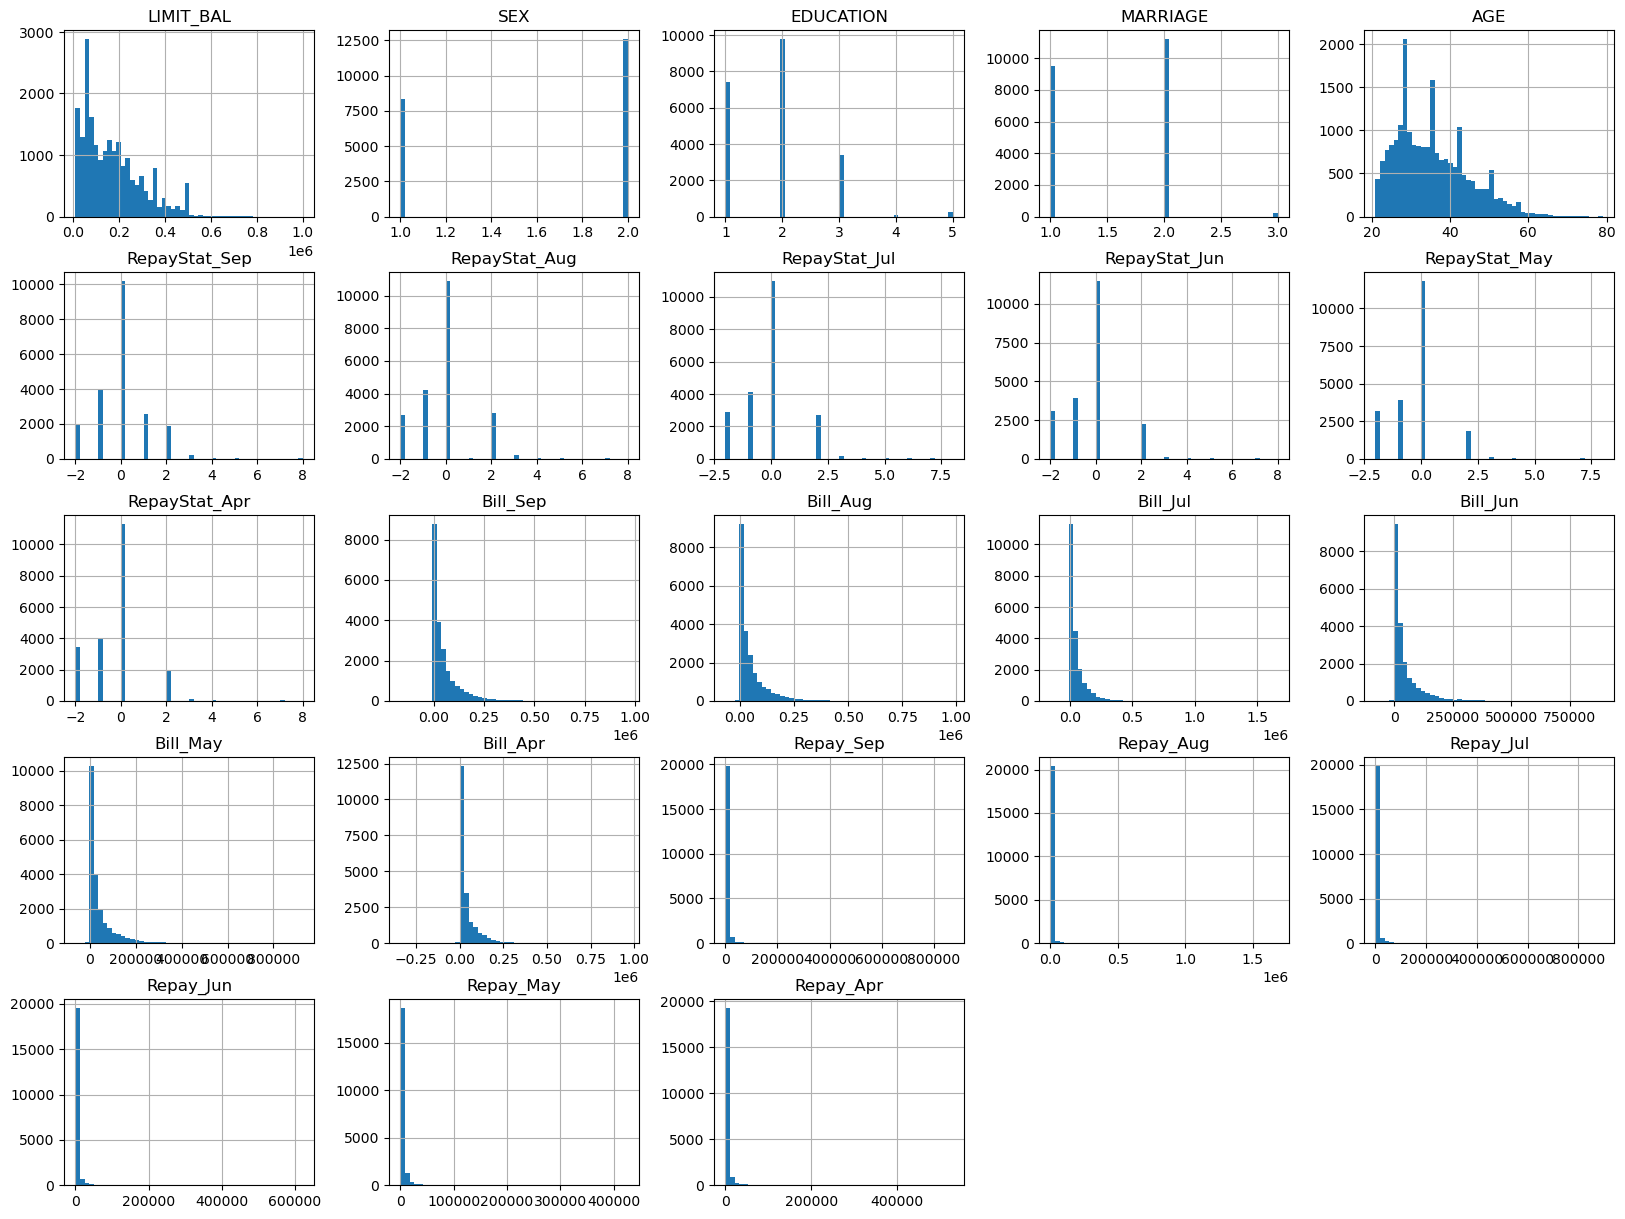

In [8]:
X_train.hist(bins=50, figsize=(20, 15));

Visualization 1: Variable that exhibit right-skewed distribution are given credits, age, bill payment across all period and repayment of previous payment across all period. The possible way to tackle the skewness would be applying log transfomration and standard scaler.

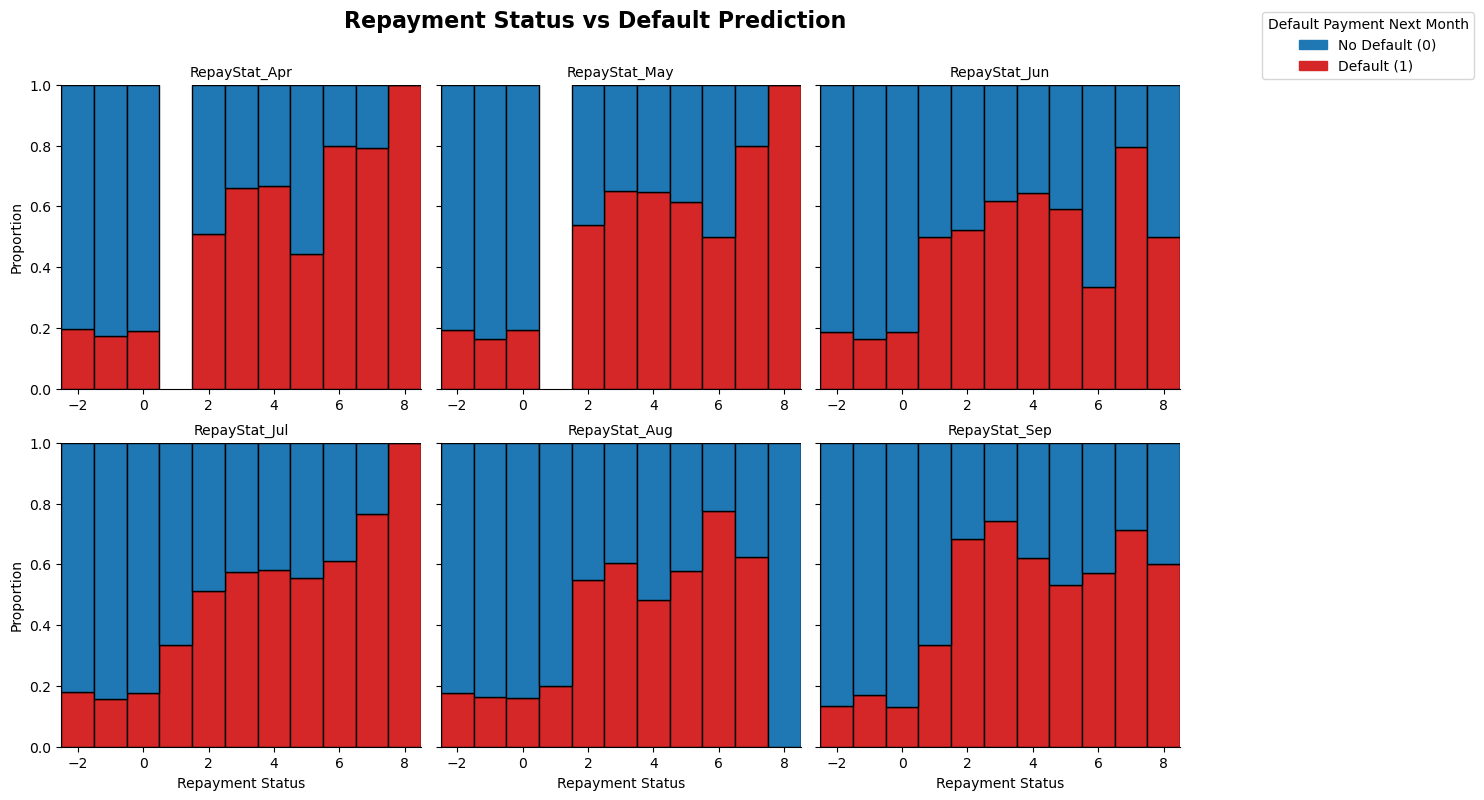

In [9]:
repay_cols = ["RepayStat_Apr", "RepayStat_May", "RepayStat_Jun",
              "RepayStat_Jul", "RepayStat_Aug", "RepayStat_Sep"]

# Melt the dataset to long format for Seaborn
df_melted = Xy_train.melt(id_vars=["Default Payment Next Month"], value_vars=repay_cols,
                           var_name="RepayStat_Month", value_name="RepayStat")

# Create FacetGrid
g = sns.FacetGrid(df_melted, col="RepayStat_Month", col_wrap=3, height=4, sharex=False, sharey=True)


palette = {0: "#1f77b4", 1: "#d62728"}  # Blue for No Default, Red for Default

# Plot bar chart with palette
g.map_dataframe(sns.histplot, x="RepayStat", hue="Default Payment Next Month", multiple="fill", 
                discrete=True, palette=palette, alpha=1)  

# Add legend
handles = [plt.Rectangle((0,0),1,1, color=palette[val]) for val in palette]
labels = ["No Default (0)", "Default (1)"]
g.fig.legend(handles, labels, title="Default Payment Next Month", loc="upper left", bbox_to_anchor=(1.05, 1))

# Adjust titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Repayment Status", "Proportion")
g.fig.suptitle("Repayment Status vs Default Prediction", fontsize=16, fontweight="bold", ha="center", va="center")

plt.subplots_adjust(top=0.9)
plt.show()


Visualization 2: Regarding the relationship between repayment status and Default Prediction, for people who repay on time (< 0), only 22% of them would default in next bill. While if repayment status greater than 0, the lengthier the delay time of repayment, the higher the proportion of default in the next period. The pattern further explain the correlation by decipting the default variable by status. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [10]:
#Create repayment amount as percentage of previous bill statement amount
X_train["RepayPercent_Last3M"] = (X_train["Repay_Sep"] + X_train["Repay_Aug"] + X_train["Repay_Jul"]) / (X_train["Bill_Aug"] + X_train["Bill_Jul"] + X_train["Bill_Jun"]).replace(0, np.nan)
X_train["RepayPercent_Last3M_lag"] = (X_train["Repay_Aug"] + X_train["Repay_Jul"]+ X_train["Repay_Jun"]) / (X_train["Bill_Jul"] + X_train["Bill_Jun"]+ X_train["Bill_May"]).replace(0, np.nan)

#Create Rate of change of repayment percentage
X_train["RepayPercentDelta"] = X_train["RepayPercent_Last3M"] / X_train["RepayPercent_Last3M_lag"].replace(0, np.nan)

#Sum of last 3 month total bill as percentage of given credit
X_train["BillasCredit_Last3M"] = (X_train["Bill_Sep"] + X_train["Bill_Aug"] + X_train["Bill_Jul"]) / X_train["LIMIT_BAL"].replace(0, np.nan)
X_train["BillasCredit_Last3M_lag"] = (X_train["Bill_Aug"] + X_train["Bill_Jul"] + X_train["Bill_Jun"]) / X_train["LIMIT_BAL"].replace(0, np.nan)

# Create repayment amount as percentage of previous bill statement amount
X_test["RepayPercent_Last3M"] = (X_test["Repay_Sep"] + X_test["Repay_Aug"] + X_test["Repay_Jul"]) / (X_test["Bill_Aug"] + X_test["Bill_Jul"] + X_test["Bill_Jun"]).replace(0, np.nan)
X_test["RepayPercent_Last3M_lag"] = (X_test["Repay_Aug"] + X_test["Repay_Jul"]+ X_test["Repay_Jun"]) / (X_test["Bill_Jul"] + X_test["Bill_Jun"]+ X_test["Bill_May"]).replace(0, np.nan)

# Create Rate of Change of repayment percentage
X_test["RepayPercentDelta"] = X_test["RepayPercent_Last3M"] / X_test["RepayPercent_Last3M_lag"].replace(0, np.nan)

# Sum of last 3 months' total bill as percentage of given credit
X_test["BillasCredit_Last3M"] = (X_test["Bill_Sep"] + X_test["Bill_Aug"] + X_test["Bill_Jul"]) / X_test["LIMIT_BAL"].replace(0, np.nan)
X_test["BillasCredit_Last3M_lag"] = (X_test["Bill_Aug"] + X_test["Bill_Jul"] + X_test["Bill_Jun"]) / X_test["LIMIT_BAL"].replace(0, np.nan)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

We group limit balance, age, bill payment and repay amount in numerical features. We also group 3 new mutanted  variables into numerical variables (RepayPercent_Last3Avg, RepayPercentDelta_Last3Avg, Last3BillasCredit). Note that we put repay status into numerical instead of categorical between it ranged from -2 to 9 and it has ordinal meaning from not using credit, to making repayment on time, then delaying payment in terms of months. 

We put marriage and education into categorical because education has a unknown group which makes difficult to interpret ordinal meaning.
We put sex into binary features

We drop variables to help to calculate the mutanted variables. 

In [11]:
numeric_feats = ["LIMIT_BAL", 
                 "AGE", 
                 "RepayStat_Sep", 
                 "RepayStat_Aug", 
                 "RepayStat_Jul", 
                 "RepayStat_Jun", 
                 "RepayStat_May", 
                 "RepayStat_Apr", 
                 "Bill_Sep", 
                 "Bill_Aug", 
                 "Bill_Jul", 
                 "Bill_Jun", 
                 "Bill_May", 
                 "Bill_Apr", 
                 "Repay_Sep", 
                 "Repay_Aug", 
                 "Repay_Jul", 
                 "Repay_Jun", 
                 "Repay_May", 
                 "Repay_Apr", 
                 "RepayPercent_Last3M",
                 "RepayPercent_Last3M_lag",
                 "RepayPercentDelta",
                 "BillasCredit_Last3M",
                 "BillasCredit_Last3M_lag"]  # apply scaling
categorical_feats = ["EDUCATION", "MARRIAGE"]  # apply one-hot encoding
binary_feats = ["SEX"]  # apply one-hot encoding with drop="if_binary"
drop_feats = [   "Bill_Sep", 
                 "Bill_Aug", 
                 "Bill_Jul", 
                 "Bill_Jun", 
                 "Bill_May", 
                 "Bill_Apr", 
                 "Repay_Sep", 
                 "Repay_Aug", 
                 "Repay_Jul", 
                 "Repay_Jun", 
                 "Repay_May", 
                 "Repay_Apr"]

In [12]:
preprocessor = make_column_transformer(    
    (StandardScaler(), numeric_feats),  # scaling on numeric features
    (OneHotEncoder(handle_unknown="ignore", drop="if_binary", dtype=int), binary_feats),  # no transformations on the binary features    
    (OneHotEncoder(handle_unknown="ignore"), categorical_feats),  # OHE on categorical features
    ("drop", drop_feats),  # drop the drop features
)

In [13]:
X_train_transformed = preprocessor.fit_transform(X_train)
#only transform test dataset, no fit to prevent data leak
X_test_transformed = preprocessor.transform(X_test)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

After running 5-fold of cross validation on dummy classifier. We can say the training and testing accuracy  is around 78.5% confidently as each fold's result are similar to each other. The result is consistent with training dataset summary statistic of average of binary target variable 0.22. However, since the dataset is imbalance, we should focus maximizing f1 and recall as we treat minority (22%) as positive classes. Since Dummy Classifier always classify most frequent class (0), there is no true positive predicted, hence recall is zero. f1 is zero as well.

In [14]:
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train_clean.index]

X_test_clean = X_test.dropna()
y_test_clean = y_test[X_test_clean.index]

dummy_clf = DummyClassifier(strategy="most_frequent") # Create a classifier object
dummy_pipe = make_pipeline(preprocessor, dummy_clf)
scoreType = ['accuracy', 'f1', 'recall']
scores = cross_validate(dummy_pipe, X_train_clean, y_train_clean, cv=5, return_train_score=True, scoring = scoreType)
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall
0,0.013736,0.005685,0.785658,0.785682,0.0,0.0,0.0,0.0
1,0.010467,0.006507,0.785658,0.785682,0.0,0.0,0.0,0.0
2,0.010917,0.005417,0.785602,0.785696,0.0,0.0,0.0,0.0
3,0.011220,0.005399,0.785602,0.785696,0.0,0.0,0.0,0.0
4,0.010158,0.006044,0.785864,0.785630,0.0,0.0,0.0,0.0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

We pick logistic regression for linear model and use class_weight = "balanced" to address imbalance class. In the first attempt without hyperparameter tunning, we obtained train score (recall) of 62.6% and test score (recall) of 62.2%.

We pick recall as score because we are more concern about missing default cases. 

With the param grid search of 36 combination of C and max_iter, after picking the best hyperparameter C = 0.0001 and max_iter = 100, train score and test score (recall) increased slightly to 65.5% and 65.4% respectively.

In [15]:
# linear model as a first real attempt
from sklearn.linear_model import LogisticRegression


#use class_weight="balanced"
lr = LogisticRegression(class_weight="balanced")
lr_pipe = make_pipeline(preprocessor, lr)
scores = cross_validate(lr_pipe, X_train_clean, y_train_clean, return_train_score=True, scoring = "recall")
pd.DataFrame(scores).mean()


fit_time       0.044813
score_time     0.004393
test_score     0.622371
train_score    0.626343
dtype: float64

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {'logisticregression__C': np.logspace(-4, 4, num=9),
              'logisticregression__max_iter': [100, 500, 1000, 10000]
}

# Create a grid search object
gs = GridSearchCV(lr_pipe, 
                  param_grid=param_grid, 
                  n_jobs=-1,  
                  return_train_score=True,  
                  cv=5, 
                  refit = "recall",
                  scoring= "recall"  
                 )

# Fit the grid search object
gs.fit(X_train_clean, y_train_clean)

pd.DataFrame(gs.cv_results_)[
    [
        "mean_train_score",
        "std_train_score",
        "mean_test_score",
        "std_test_score",
        "param_logisticregression__C",
        "param_logisticregression__max_iter",
        "mean_fit_time",
        "mean_score_time",
        "rank_test_score",
    ]
].sort_values(by="mean_test_score", ascending=False).T


,0,2,3,1,4,5,6,7,31,30,...,16,35,15,14,13,12,11,10,9,8
mean_train_score,0.655410,0.655410,0.655410,0.655410,0.630801,0.630801,0.630801,0.630801,0.625855,0.625855,...,0.626343,0.626160,0.625366,0.625366,0.625366,0.625366,0.623107,0.623107,0.623107,0.623107
std_train_score,0.003706,0.003706,0.003706,0.003706,0.004698,0.004698,0.004698,0.004698,0.006948,0.006948,...,0.006638,0.006606,0.007103,0.007103,0.007103,0.007103,0.005852,0.005852,0.005852,0.005852
mean_test_score,0.654369,0.654369,0.654369,0.654369,0.630921,0.630921,0.630921,0.630921,0.622615,0.622615,...,0.622371,0.622371,0.620662,0.620662,0.620662,0.620662,0.619442,0.619442,0.619442,0.619442
std_test_score,0.025385,0.025385,0.025385,0.025385,0.021493,0.021493,0.021493,0.021493,0.020683,0.020683,...,0.021059,0.021059,0.019596,0.019596,0.019596,0.019596,0.017514,0.017514,0.017514,0.017514
param_logisticregression__C,0.000100,0.000100,0.000100,0.000100,0.001000,0.001000,0.001000,0.001000,1000.000000,1000.000000,...,1.000000,10000.000000,0.100000,0.100000,0.100000,0.100000,0.010000,0.010000,0.010000,0.010000
param_logisticregression__max_iter,100.000000,1000.000000,10000.000000,500.000000,100.000000,500.000000,1000.000000,10000.000000,10000.000000,1000.000000,...,100.000000,10000.000000,10000.000000,1000.000000,500.000000,100.000000,10000.000000,1000.000000,500.000000,100.000000
mean_fit_time,0.055545,0.042486,0.040664,0.046127,0.042488,0.043819,0.043155,0.043346,0.086107,0.077483,...,0.080000,0.078982,0.078330,0.080642,0.075305,0.090753,0.067305,0.067333,0.072765,0.068041
mean_score_time,0.014590,0.007984,0.008162,0.014577,0.011652,0.008328,0.007438,0.006940,0.013929,0.009282,...,0.009293,0.006115,0.007923,0.008007,0.009022,0.010220,0.011492,0.009186,0.008896,0.010955
rank_test_score,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,9.000000,9.000000,...,13.000000,13.000000,29.000000,29.000000,29.000000,29.000000,33.000000,33.000000,33.000000,33.000000


In [17]:
best_parameters = gs.best_params_

pipe_lr_retrain = make_pipeline(preprocessor, 
                                LogisticRegression(class_weight="balanced", max_iter = 100, C = 0.0001, n_jobs=-1))
pipe_lr_retrain.fit(
    X_train_clean, y_train_clean
) 

#scoring with best hyperparameter
score = pipe_lr_retrain.score(X_train_clean, y_train_clean)
score

0.6874149303737829

<!-- END QUESTION -->

<br><br>

In [18]:
#CV on the best hyperparameter
cv_results = cross_validate(
    pipe_lr_retrain, X_train_clean, y_train_clean, 
    return_train_score=True, scoring="recall", cv=5, n_jobs=-1
)

# Store result
results = {}
results["Logistic (Q7)"] = {
    "fit time": np.mean(cv_results["fit_time"]),
    "score time": np.mean(cv_results["score_time"]),
    "train score": np.mean(cv_results["train_score"]),
    "test score": np.mean(cv_results["test_score"]),
}


<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

I performed Random forests, SVM, Decision Tree, CatBoost, LightGBM and XGBoost.

In terms of computation time, SVM has the longest fit and score time combined (1.35) while Logistic has the fastest fit and score time (0.04). 

Models that exhibit overfitting include Random forests, Decision Tree (training and validation score gap ~50%). CatBoost showed signed of overfitting but less server as compared to others, with only 12-14% gap between training and test score.

Random forests and Decision Tree all beat linear model significantly in trainning score (90-100%) but they all suffer from overfitting as test score perform extremely poor (27-36%)

Comparing with test score, nope of the model's score can exceed linear model test score of 65.4%

In [19]:
#Random Forest ensemble model
from sklearn.ensemble import RandomForestClassifier

pipe_rf_ensemble = make_pipeline(
    preprocessor, RandomForestClassifier(n_estimators=10, random_state=123, class_weight="balanced")
)

cv_results = cross_validate(
    pipe_rf_ensemble, X_train_clean, y_train_clean, 
    return_train_score=True, scoring="recall", cv=5
)

results["Random forests"] = {
    "fit time": np.mean(cv_results["fit_time"]),
    "score time": np.mean(cv_results["score_time"]),
    "train score": np.mean(cv_results["train_score"]),
    "test score": np.mean(cv_results["test_score"]),
}

In [20]:
# from sklearn.svm import SVC
# pipe_svm = make_pipeline(
#     preprocessor, SVC(random_state=123, class_weight="balanced")
# )
# cv_results = cross_validate(
#     pipe_svm, X_train_clean, y_train_clean, 
#     return_train_score=True, scoring="recall", cv=5, n_jobs=-1
# )
# results["SVM"] = {
#     "fit time": np.mean(cv_results["fit_time"]),
#     "score time": np.mean(cv_results["score_time"]),
#     "train score": np.mean(cv_results["train_score"]),
#     "test score": np.mean(cv_results["test_score"]),
# }

In [21]:

pipe_decisionTree = make_pipeline(
    preprocessor, DecisionTreeClassifier(random_state=123, class_weight="balanced")
)
cv_results = cross_validate(
    pipe_decisionTree, X_train_clean, y_train_clean, 
    return_train_score=True, scoring="recall", cv=5, n_jobs=-1
)
results["Decision Tree"] = {
    "fit time": np.mean(cv_results["fit_time"]),
    "score time": np.mean(cv_results["score_time"]),
    "train score": np.mean(cv_results["train_score"]),
    "test score": np.mean(cv_results["test_score"]),
}

In [22]:
from catboost import CatBoostClassifier
pipe_catboost = make_pipeline(
    preprocessor,
    CatBoostClassifier(iterations=100, verbose=0, random_state=123),
)
cv_results = cross_validate(
    pipe_catboost, X_train_clean, y_train_clean, 
    return_train_score=True, scoring="recall", cv=5, n_jobs=-1
)
results["CatBoost"] = {
    "fit time": np.mean(cv_results["fit_time"]),
    "score time": np.mean(cv_results["score_time"]),
    "train score": np.mean(cv_results["train_score"]),
    "test score": np.mean(cv_results["test_score"]),
}

<!-- END QUESTION -->

<br><br>

In [23]:
pd.DataFrame(results).T

,fit time,score time,train score,test score
Logistic (Q7),0.034289,0.009219,0.655410,0.654369
Random forests,0.339690,0.008557,0.909013,0.274549
Decision Tree,0.419959,0.007070,1.000000,0.375427
CatBoost,1.068276,0.036393,0.489924,0.367609


<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

Since SVM is not a tree-based algo, no feature importance can be extracted, thus we skipped SVM for feature selection. Most of the result remained roughly the same from Q8, with very moderate improvement in test score of Random Forest yet, overfitting issue still exist. Therefore we would not keep feature select in next exercise.

In [24]:
from sklearn.feature_selection import RFECV

rfe_cv = RFECV(LogisticRegression(max_iter=100, C = 0.0001, class_weight = "balanced"), scoring="recall", cv=5, n_jobs=-1)
rfe_pipe = make_pipeline(preprocessor, rfe_cv)

cv_results = cross_validate(
    rfe_pipe, X_train_clean, y_train_clean, 
    return_train_score=True, scoring="recall", cv=5, n_jobs=-1
)
results["Logistic (RFE)"] = {
    "fit time": np.mean(cv_results["fit_time"]),
    "score time": np.mean(cv_results["score_time"]),
    "train score": np.mean(cv_results["train_score"]),
    "test score": np.mean(cv_results["test_score"]),
}

In [25]:
rfe_cv = RFECV(RandomForestClassifier(n_estimators=10, class_weight = "balanced"), scoring="recall", cv=5, n_jobs=-1)
rfe_pipe = make_pipeline(preprocessor, rfe_cv)

cv_results = cross_validate(
    rfe_pipe, X_train_clean, y_train_clean, 
    return_train_score=True, scoring="recall", cv=5, n_jobs=-1
)
results["Random Forest (RFE)"] = {
    "fit time": np.mean(cv_results["fit_time"]),
    "score time": np.mean(cv_results["score_time"]),
    "train score": np.mean(cv_results["train_score"]),
    "test score": np.mean(cv_results["test_score"]),
}

In [26]:
rfe_cv = RFECV(DecisionTreeClassifier(random_state=123, class_weight="balanced"), scoring="recall",cv=5, n_jobs=-1)
rfe_pipe = make_pipeline(preprocessor, rfe_cv)

cv_results = cross_validate(
    rfe_pipe, X_train_clean, y_train_clean, 
    return_train_score=True, scoring="recall", cv=5, n_jobs=-1
)
results["Decision Tree (RFE)"] = {
    "fit time": np.mean(cv_results["fit_time"]),
    "score time": np.mean(cv_results["score_time"]),
    "train score": np.mean(cv_results["train_score"]),
    "test score": np.mean(cv_results["test_score"]),
}

In [27]:
rfe_cv = RFECV(CatBoostClassifier(iterations=100, verbose=0, random_state=123), scoring="recall",cv=5, n_jobs=-1)
rfe_pipe = make_pipeline(preprocessor, rfe_cv)

cv_results = cross_validate(
    rfe_pipe, X_train_clean, y_train_clean, 
    return_train_score=True, scoring="recall", cv=5, n_jobs=-1
)
results["CatBoost (RFE)"] = {
    "fit time": np.mean(cv_results["fit_time"]),
    "score time": np.mean(cv_results["score_time"]),
    "train score": np.mean(cv_results["train_score"]),
    "test score": np.mean(cv_results["test_score"]),
}

<!-- END QUESTION -->

<br><br>

In [28]:
pd.DataFrame(results).T

,fit time,score time,train score,test score
Logistic (Q7),0.034289,0.009219,0.655410,0.654369
Random forests,0.339690,0.008557,0.909013,0.274549
Decision Tree,0.419959,0.007070,1.000000,0.375427
CatBoost,1.068276,0.036393,0.489924,0.367609
Logistic (RFE),2.243892,0.006002,0.658280,0.655838
Random Forest (RFE),54.972621,0.011589,0.900281,0.297017
Decision Tree (RFE),38.903139,0.006475,1.000000,0.370050
CatBoost (RFE),85.400543,0.022945,0.488825,0.366880


<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

In [29]:
#logistic regression
param_grid = {
    'logisticregression__C': np.logspace(-4, 4, 9),  
    'logisticregression__tol': [1e-4, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
    'logisticregression__max_iter': np.logspace(3, 7, num=5, dtype=int)
}

gs_lr = GridSearchCV(lr_pipe, 
                  param_grid=param_grid, 
                  n_jobs=-1, cv=5, 
                  return_train_score=True,
                  refit="recall", 
                  scoring="recall")

gs_lr.fit(X_train_clean, y_train_clean)
cv_results_sorted = pd.DataFrame(gs_lr.cv_results_)[
    [
        "mean_train_score",
        "std_train_score",
        "mean_test_score",
        "std_test_score",
        "param_logisticregression__C",
        "param_logisticregression__tol",
        "param_logisticregression__max_iter",
        "mean_fit_time",
        "mean_score_time",
        "rank_test_score",
    ]
].sort_values(by="mean_test_score", ascending=False).T

cv_results_sorted

,290,50,146,138,274,130,282,122,34,338,...,148,149,150,151,155,156,157,158,159,359
mean_train_score,0.745359,0.745359,0.745359,0.745359,7.453589e-01,0.745359,0.745359,0.745359,7.453589e-01,0.745359,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_train_score,0.006475,0.006475,0.006475,0.006475,6.475275e-03,0.006475,0.006475,0.006475,6.475275e-03,0.006475,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
mean_test_score,0.746457,0.746457,0.746457,0.746457,7.464572e-01,0.746457,0.746457,0.746457,7.464572e-01,0.746457,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_test_score,0.021890,0.021890,0.021890,0.021890,2.188971e-02,0.021890,0.021890,0.021890,2.188971e-02,0.021890,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
param_logisticregression__C,1000.000000,0.001000,0.100000,0.100000,1.000000e+02,0.100000,1000.000000,0.100000,1.000000e-04,10000.000000,...,0.100000,0.100000,0.100000,0.100000,1.000000e-01,1.000000e-01,1.000000e-01,1.000000e-01,1.000000e-01,1.000000e+04
param_logisticregression__tol,0.100000,0.100000,0.100000,0.100000,1.000000e-01,0.100000,0.100000,0.100000,1.000000e-01,0.100000,...,10.000000,100.000000,1000.000000,10000.000000,1.000000e+00,1.000000e+01,1.000000e+02,1.000000e+03,1.000000e+04,1.000000e+04
param_logisticregression__max_iter,10000.000000,10000.000000,1000000.000000,100000.000000,1.000000e+07,10000.000000,1000.000000,1000.000000,1.000000e+07,100000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean_fit_time,0.085508,0.032685,0.035772,0.033560,3.408084e-02,0.034929,0.032386,0.032394,2.792511e-02,0.033940,...,0.027973,0.026407,0.027192,0.033204,2.885451e-02,3.145094e-02,3.029861e-02,2.920084e-02,2.833176e-02,2.833281e-02
mean_score_time,0.035443,0.012056,0.011464,0.015978,1.156764e-02,0.008773,0.011130,0.011004,1.300249e-02,0.010669,...,0.010549,0.009925,0.007198,0.010804,7.031250e-03,9.063721e-03,1.187758e-02,1.020274e-02,1.606145e-02,7.165432e-03
rank_test_score,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,1.000000,...,136.000000,136.000000,136.000000,136.000000,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02


In [30]:
# Get best hyperparameters
best_params = gs_lr.best_params_

# Create a new model using the best hyperparameters for future use
best_lr = LogisticRegression(
    C=best_params['logisticregression__C'], 
    tol=best_params['logisticregression__tol'], 
    max_iter=best_params['logisticregression__max_iter'],
    class_weight="balanced"
)

#store in table
first_column = cv_results_sorted.iloc[:, 0]
results["Logistic (param tuned)"] = {
    "fit time": first_column["mean_fit_time"],
    "score time": first_column["mean_score_time"],
    "train score": first_column["mean_train_score"],
    "test score": first_column["mean_test_score"],
}
pd.DataFrame(results).T

,fit time,score time,train score,test score
Logistic (Q7),0.034289,0.009219,0.655410,0.654369
Random forests,0.339690,0.008557,0.909013,0.274549
Decision Tree,0.419959,0.007070,1.000000,0.375427
CatBoost,1.068276,0.036393,0.489924,0.367609
Logistic (RFE),2.243892,0.006002,0.658280,0.655838
Random Forest (RFE),54.972621,0.011589,0.900281,0.297017
Decision Tree (RFE),38.903139,0.006475,1.000000,0.370050
CatBoost (RFE),85.400543,0.022945,0.488825,0.366880
Logistic (param tuned),0.085508,0.035443,0.745359,0.746457


In [31]:
#Random Forest
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200, 500, 1000],  
    'randomforestclassifier__max_depth': [5, 10, 25, 50, 100],  
}


pipe_rf = make_pipeline(
    preprocessor, 
    RandomForestClassifier(random_state=123, class_weight="balanced", n_jobs=-1)
)

gs_rf = GridSearchCV(pipe_rf, 
                  param_grid=param_grid, 
                  n_jobs=-1,  
                  return_train_score=True,  
                  cv=5,  
                  refit="recall",  
                  scoring="recall" 
                 )


gs_rf.fit(X_train_clean, y_train_clean)

cv_results_sorted = pd.DataFrame(gs_rf.cv_results_)[
    [
        "mean_train_score",
        "std_train_score",
        "mean_test_score",
        "std_test_score",
        "param_randomforestclassifier__n_estimators",
        "param_randomforestclassifier__max_depth",
        "mean_fit_time",
        "mean_score_time",
        "rank_test_score",
    ]
].sort_values(by="mean_test_score", ascending=False).T

cv_results_sorted

/opt/homebrew/Caskroom/miniconda/base/envs/cpsc330/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


,0,1,4,2,3,6,9,7,8,5,...,19,24,18,23,17,22,16,21,15,20
mean_train_score,0.570103,0.571019,0.571873,0.569675,0.570774,0.679104,0.676662,0.678677,0.676784,0.679349,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.997069,0.997069
std_train_score,0.002625,0.001683,0.004153,0.004140,0.004400,0.006104,0.005531,0.005709,0.005871,0.008441,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000457,0.000457
mean_test_score,0.559110,0.555201,0.553735,0.553002,0.551780,0.517585,0.517584,0.516852,0.516363,0.516118,...,0.322910,0.322910,0.322421,0.322421,0.320712,0.320712,0.314605,0.314605,0.307278,0.307278
std_test_score,0.018166,0.016135,0.016798,0.017418,0.017570,0.025302,0.024187,0.022886,0.023645,0.027713,...,0.012142,0.012142,0.018113,0.018113,0.011835,0.011835,0.011188,0.011188,0.012881,0.012881
param_randomforestclassifier__n_estimators,50.000000,100.000000,1000.000000,200.000000,500.000000,100.000000,1000.000000,200.000000,500.000000,50.000000,...,1000.000000,1000.000000,500.000000,500.000000,200.000000,200.000000,100.000000,100.000000,50.000000,50.000000
param_randomforestclassifier__max_depth,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,50.000000,100.000000,50.000000,100.000000,50.000000,100.000000,50.000000,100.000000,50.000000,100.000000
mean_fit_time,1.336012,2.379392,24.250745,4.785435,12.362711,4.324679,41.674083,8.080127,20.377291,2.144558,...,60.320680,46.183080,26.673373,28.621664,12.276951,12.590099,6.543293,6.526455,3.365106,3.371488
mean_score_time,0.039233,0.049880,0.319749,0.081672,0.152869,0.040488,0.496872,0.065053,0.161571,0.036306,...,0.698261,0.409129,0.246735,0.284652,0.086576,0.100060,0.065179,0.056484,0.041668,0.045108
rank_test_score,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,...,16.000000,16.000000,18.000000,18.000000,20.000000,20.000000,22.000000,22.000000,24.000000,24.000000


In [32]:
first_column = cv_results_sorted.iloc[:, 0]
results["Random Forest (param tuned)"] = {
    "fit time": first_column["mean_fit_time"],
    "score time": first_column["mean_score_time"],
    "train score": first_column["mean_train_score"],
    "test score": first_column["mean_test_score"],
}
pd.DataFrame(results).T

,fit time,score time,train score,test score
Logistic (Q7),0.034289,0.009219,0.655410,0.654369
Random forests,0.339690,0.008557,0.909013,0.274549
Decision Tree,0.419959,0.007070,1.000000,0.375427
CatBoost,1.068276,0.036393,0.489924,0.367609
Logistic (RFE),2.243892,0.006002,0.658280,0.655838
Random Forest (RFE),54.972621,0.011589,0.900281,0.297017
Decision Tree (RFE),38.903139,0.006475,1.000000,0.370050
CatBoost (RFE),85.400543,0.022945,0.488825,0.366880
Logistic (param tuned),0.085508,0.035443,0.745359,0.746457
Random Forest (param tuned),1.336012,0.039233,0.570103,0.559110


In [33]:
# Decision Tree
param_grid = {
    'decisiontreeclassifier__max_depth': list(range(1, 500, 50))
}


pipe_dt = make_pipeline(
    preprocessor, 
    DecisionTreeClassifier(random_state=123, class_weight="balanced") 
)


gs_dt = GridSearchCV(pipe_dt, 
                  param_grid=param_grid, 
                  n_jobs=-1, 
                  return_train_score=True,  
                  cv=5,  
                  refit="recall",  
                  scoring="recall"  
                 )

gs_dt.fit(X_train_clean, y_train_clean)

cv_results_sorted = pd.DataFrame(gs_dt.cv_results_)[
    [
        "mean_train_score",
        "std_train_score",
        "mean_test_score",
        "std_test_score",
        "param_decisiontreeclassifier__max_depth",
        "mean_fit_time",
        "mean_score_time",
        "rank_test_score",
    ]
].sort_values(by="mean_test_score", ascending=False).T
cv_results_sorted

,0,1,2,3,4,5,6,7,8,9
mean_train_score,0.497557,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std_train_score,0.002714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mean_test_score,0.497556,0.375427,0.375427,0.375427,0.375427,0.375427,0.375427,0.375427,0.375427,0.375427
std_test_score,0.010854,0.009064,0.009064,0.009064,0.009064,0.009064,0.009064,0.009064,0.009064,0.009064
param_decisiontreeclassifier__max_depth,1.000000,51.000000,101.000000,151.000000,201.000000,251.000000,301.000000,351.000000,401.000000,451.000000
mean_fit_time,0.086331,0.705707,0.765401,0.757972,0.760672,0.697107,0.694915,0.705814,0.682427,0.650411
mean_score_time,0.014353,0.011919,0.014913,0.009491,0.009674,0.009655,0.012623,0.010967,0.013261,0.009041
rank_test_score,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [34]:
first_column = cv_results_sorted.iloc[:, 0]
results["Decision Tree (param tuned)"] = {
    "fit time": first_column["mean_fit_time"],
    "score time": first_column["mean_score_time"],
    "train score": first_column["mean_train_score"],
    "test score": first_column["mean_test_score"],
}
pd.DataFrame(results).T

,fit time,score time,train score,test score
Logistic (Q7),0.034289,0.009219,0.655410,0.654369
Random forests,0.339690,0.008557,0.909013,0.274549
Decision Tree,0.419959,0.007070,1.000000,0.375427
CatBoost,1.068276,0.036393,0.489924,0.367609
Logistic (RFE),2.243892,0.006002,0.658280,0.655838
Random Forest (RFE),54.972621,0.011589,0.900281,0.297017
Decision Tree (RFE),38.903139,0.006475,1.000000,0.370050
CatBoost (RFE),85.400543,0.022945,0.488825,0.366880
Logistic (param tuned),0.085508,0.035443,0.745359,0.746457
Random Forest (param tuned),1.336012,0.039233,0.570103,0.559110


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

The average predicted value for all sample in training set is -1.67. For the sample index 5000, repay status in September is the most important feature contribute to prediction of that sample. It has a value of +1.61. Combined with the second important variable bill_jul which is -0.36 and the rest of the variable. The model preidction for index 5000 is -0.478. 

Most of the feature engineering variables have insignificant contribution to prediction, as well as sex, education and marriage.

From the summary graph of average SHAP value, we see a long tail of red line in repay status in September, which is expected as people with larger value of repay status are likely to default in next period, therefore contributing a large SHAP. However, we also observed some pink dot clustering in SHAP negative territory.

In [35]:


model = pipe_catboost.named_steps["catboostclassifier"]
model.fit(X_train_clean, y_train_clean)


In [36]:
import shap 

explainer = shap.TreeExplainer(model) # define the shap explainer 
train_shap_values = explainer(X_train_clean) # train shap values
test_shap_values = explainer(X_test_clean) # test shap values 

In [37]:
train_shap_values.shape

(19102, 28)

In [38]:
test_shap_values.shape

(8197, 28)

In [39]:
train_shap_values

.values =
array([[ 0.10184054, -0.02227151,  0.01115622, ...,  0.01381919,
        -0.07610987,  0.07163049],
       [-0.44863174,  0.03159255,  0.00177265, ...,  0.02807063,
        -0.09423222,  0.19908714],
       [-0.07332032,  0.06485202, -0.05214624, ...,  0.10003925,
        -0.04449475,  0.0729948 ],
       ...,
       [-0.02122238, -0.09302374, -0.18455638, ..., -0.0071832 ,
         0.42458345,  0.02588295],
       [-0.07722334, -0.05574903, -0.01559068, ..., -0.06544545,
        -0.04167711, -0.10329813],
       [-0.09328815, -0.08112218, -0.00906164, ..., -0.03112547,
        -0.12601148, -0.03542885]])

.base_values =
array([-1.67004073, -1.67004073, -1.67004073, ..., -1.67004073,
       -1.67004073, -1.67004073])

.data =
array([[6.00000000e+04, 2.00000000e+00, 2.00000000e+00, ...,
        1.53235451e+00, 3.40950000e-01, 4.15566667e-01],
       [3.60000000e+05, 1.00000000e+00, 1.00000000e+00, ...,
        7.17445723e-01, 1.71258056e+00, 1.74236667e+00],
       [1.80000000

In [40]:
ex1_idx = 5000

In [41]:
X_test_clean.iloc[ex1_idx]

LIMIT_BAL                  80000.000000
SEX                            1.000000
EDUCATION                      2.000000
MARRIAGE                       2.000000
AGE                           27.000000
RepayStat_Sep                  2.000000
RepayStat_Aug                 -1.000000
RepayStat_Jul                 -1.000000
RepayStat_Jun                  0.000000
RepayStat_May                  0.000000
RepayStat_Apr                  0.000000
Bill_Sep                    1195.000000
Bill_Aug                     553.000000
Bill_Jul                    1074.000000
Bill_Jun                   35783.000000
Bill_May                   35488.000000
Bill_Apr                   36020.000000
Repay_Sep                    700.000000
Repay_Aug                   1074.000000
Repay_Jul                  35000.000000
Repay_Jun                   1300.000000
Repay_May                   1400.000000
Repay_Apr                   1300.000000
RepayPercent_Last3M            0.982999
RepayPercent_Last3M_lag        0.516608


In [42]:
y_test_clean.iloc[ex1_idx]

0

In [43]:
model.predict(X_test_clean)[ex1_idx]

0

In [44]:
model.predict_proba(X_test_clean)[ex1_idx]

array([0.61717031, 0.38282969])

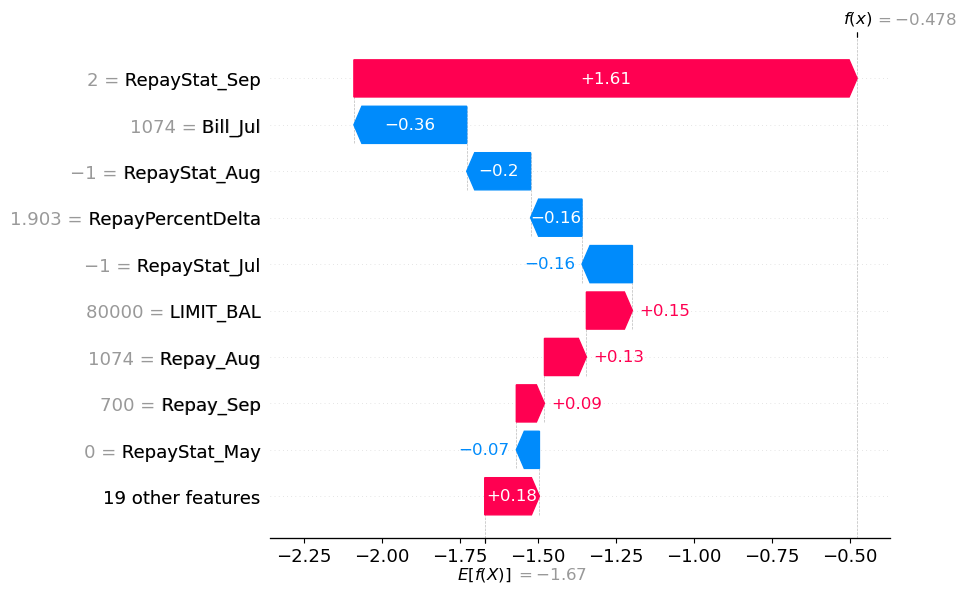

In [45]:
shap.plots.waterfall(test_shap_values[ex1_idx])

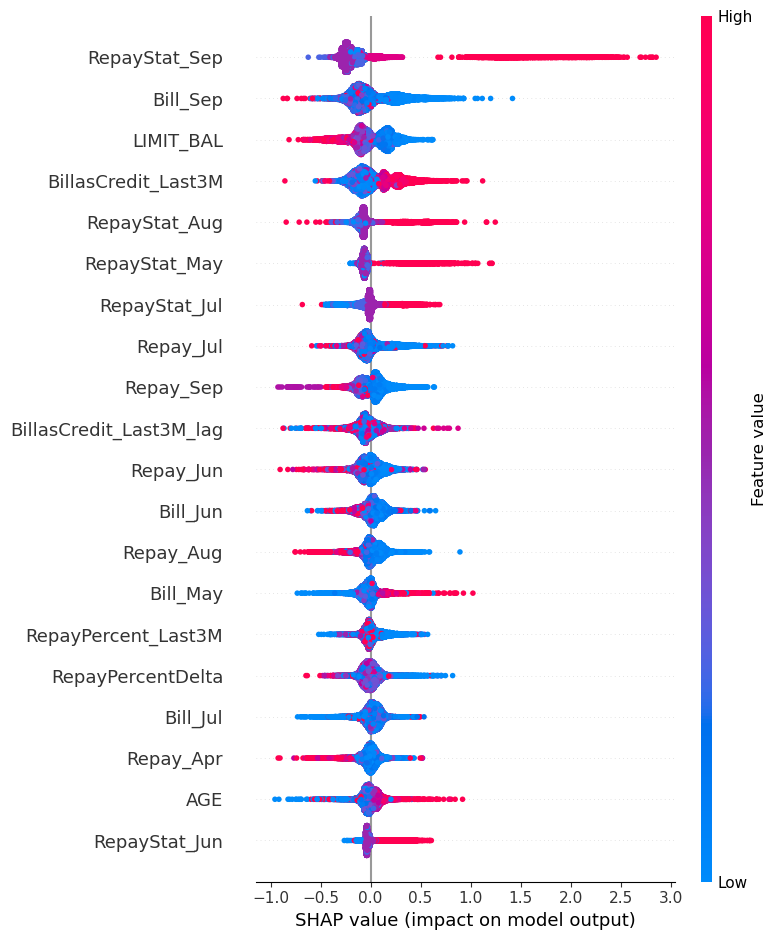

In [46]:
shap.summary_plot(train_shap_values, X_train_clean)

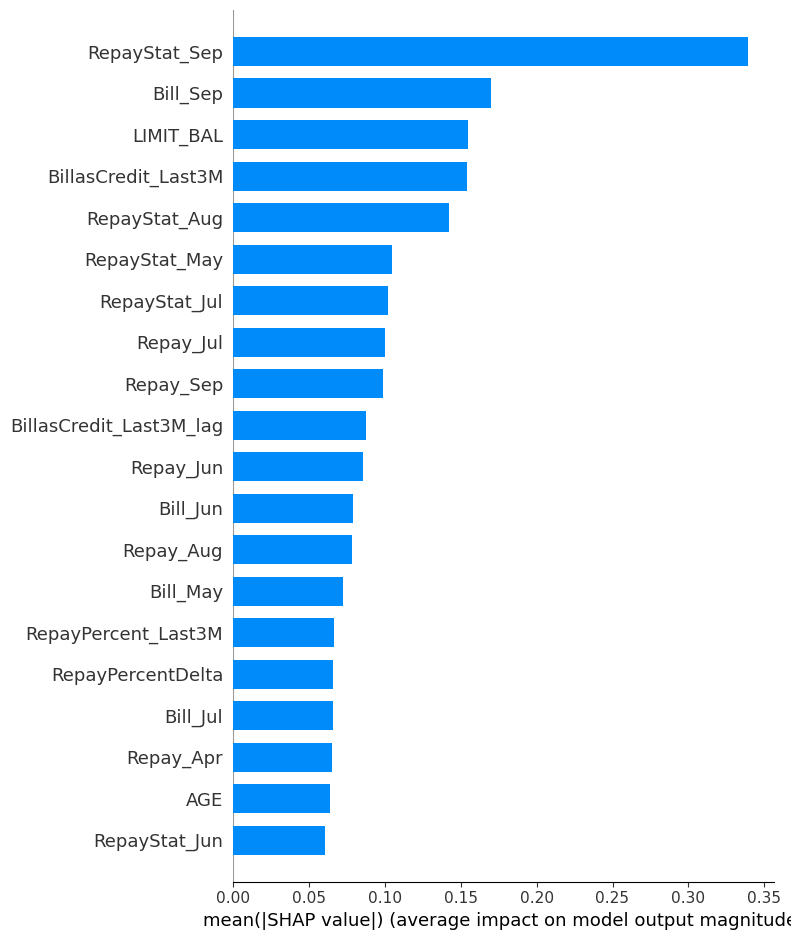

In [47]:
shap.summary_plot(train_shap_values, X_train_clean, plot_type="bar")

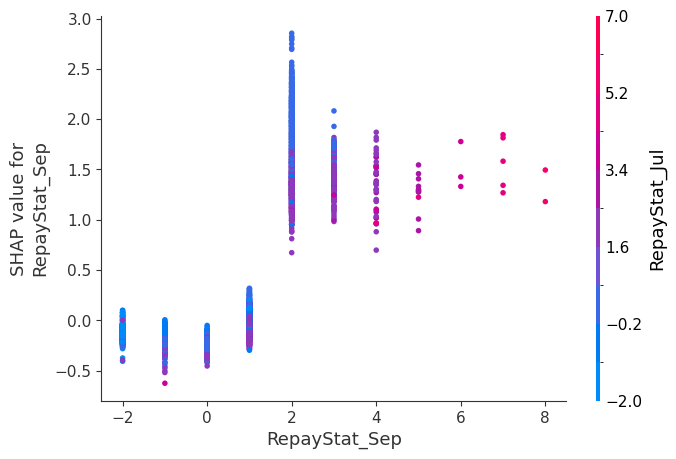

In [48]:
shap.dependence_plot("RepayStat_Sep", train_shap_values.values, X_train_clean)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

The logistic regression with hyperparameters  C = 1000, tol = 0.1 and max_iter = 10000 has validation score and test score around 74.5% and score on test dataset is 74.97%. Overall, I think we don't have overfit issue as both validation score and training score are close enough. We don't have issue in optimization bias as well as the test dataset recall score is close to training/validation score.

Optimization bias happens if our training data is very small. Since we have 19102 sample in training data. With CV = 5, we have 3820 sample in validation set, it should consider large enough.

In the SHAP graphs, base value of the two graph are the same because it represent the average predicted value for all sample in training set which is -1.67. For id 5000, the most contributed feature is Repay Status in September which has a value of 1.61 (from above), while other features contribution are less significant. The model preidction for index 5000 is -0.48. 
For id 8000, each features contribute more even to SHAP with Bill_September dragging the SHAP most. There are no significant features dominate the SHAP. All the features combined makes the model predicted -2.68.

In [49]:
from sklearn.metrics import recall_score
best_lr_pipe = make_pipeline(preprocessor, best_lr)
best_lr_pipe.fit(X_train_clean, y_train_clean)
y_pred = best_lr_pipe.predict(X_test_clean)

#recall score
recall = recall_score(y_test_clean, y_pred)
print(f"Recall score: {recall:.4f}")


Recall score: 0.7497


In [50]:
X_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19102 entries, 15615 to 20008
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LIMIT_BAL                19102 non-null  float64
 1   SEX                      19102 non-null  int64  
 2   EDUCATION                19102 non-null  int64  
 3   MARRIAGE                 19102 non-null  int64  
 4   AGE                      19102 non-null  int64  
 5   RepayStat_Sep            19102 non-null  int64  
 6   RepayStat_Aug            19102 non-null  int64  
 7   RepayStat_Jul            19102 non-null  int64  
 8   RepayStat_Jun            19102 non-null  int64  
 9   RepayStat_May            19102 non-null  int64  
 10  RepayStat_Apr            19102 non-null  int64  
 11  Bill_Sep                 19102 non-null  float64
 12  Bill_Aug                 19102 non-null  float64
 13  Bill_Jul                 19102 non-null  float64
 14  Bill_Jun               

In [51]:
ex1_idx = 5000

In [52]:
X_test_clean.iloc[ex1_idx]

LIMIT_BAL                  80000.000000
SEX                            1.000000
EDUCATION                      2.000000
MARRIAGE                       2.000000
AGE                           27.000000
RepayStat_Sep                  2.000000
RepayStat_Aug                 -1.000000
RepayStat_Jul                 -1.000000
RepayStat_Jun                  0.000000
RepayStat_May                  0.000000
RepayStat_Apr                  0.000000
Bill_Sep                    1195.000000
Bill_Aug                     553.000000
Bill_Jul                    1074.000000
Bill_Jun                   35783.000000
Bill_May                   35488.000000
Bill_Apr                   36020.000000
Repay_Sep                    700.000000
Repay_Aug                   1074.000000
Repay_Jul                  35000.000000
Repay_Jun                   1300.000000
Repay_May                   1400.000000
Repay_Apr                   1300.000000
RepayPercent_Last3M            0.982999
RepayPercent_Last3M_lag        0.516608


In [53]:
# load JS visualization code to notebook
shap.initjs()

In [54]:
shap.force_plot(explainer.expected_value, test_shap_values.values[ex1_idx, :], X_test_clean.iloc[ex1_idx, :])

In [55]:
ex2_idx = 8000

In [56]:
X_test_clean.iloc[ex2_idx]

LIMIT_BAL                  220000.000000
SEX                             2.000000
EDUCATION                       2.000000
MARRIAGE                        1.000000
AGE                            34.000000
RepayStat_Sep                  -1.000000
RepayStat_Aug                  -1.000000
RepayStat_Jul                  -1.000000
RepayStat_Jun                  -1.000000
RepayStat_May                  -1.000000
RepayStat_Apr                  -1.000000
Bill_Sep                    51565.000000
Bill_Aug                    15683.000000
Bill_Jul                     1381.000000
Bill_Jun                     3300.000000
Bill_May                     2452.000000
Bill_Apr                     2728.000000
Repay_Sep                   15683.000000
Repay_Aug                    1381.000000
Repay_Jul                    3300.000000
Repay_Jun                    2452.000000
Repay_May                    2728.000000
Repay_Apr                       0.000000
RepayPercent_Last3M             1.000000
RepayPercent_Las

In [57]:
# load JS visualization code to notebook
shap.initjs()

In [58]:
shap.force_plot(explainer.expected_value, test_shap_values.values[ex2_idx, :], X_test_clean.iloc[ex2_idx, :])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

The hyperparameter tunned logistic regression has to best validation test score. 

The Ultimate goal is to predict whether a individual would default his payment in the next period. So choosing a table of confusion matrix with the best model (highest validation score) would be a good summary.

The recall score is our interested score as we care how good the model is detecting true positive. We have a recall score 75% in test dataset, roughly the same as validation test score 74.5% from training data. As we have around 3800 validation sample, the size is huge enough that we are unlikely to have optimization bias.

Since the SHAP summary suggest the newly constructed features doesn't contribute a lot in model prediction, I would like to try some new features construction. Especially some variables that are able to capture some trend in credit pattern, severing some predictability on default label.


In [59]:
pd.DataFrame(results).T

,fit time,score time,train score,test score
Logistic (Q7),0.034289,0.009219,0.655410,0.654369
Random forests,0.339690,0.008557,0.909013,0.274549
Decision Tree,0.419959,0.007070,1.000000,0.375427
CatBoost,1.068276,0.036393,0.489924,0.367609
Logistic (RFE),2.243892,0.006002,0.658280,0.655838
Random Forest (RFE),54.972621,0.011589,0.900281,0.297017
Decision Tree (RFE),38.903139,0.006475,1.000000,0.370050
CatBoost (RFE),85.400543,0.022945,0.488825,0.366880
Logistic (param tuned),0.085508,0.035443,0.745359,0.746457
Random Forest (param tuned),1.336012,0.039233,0.570103,0.559110


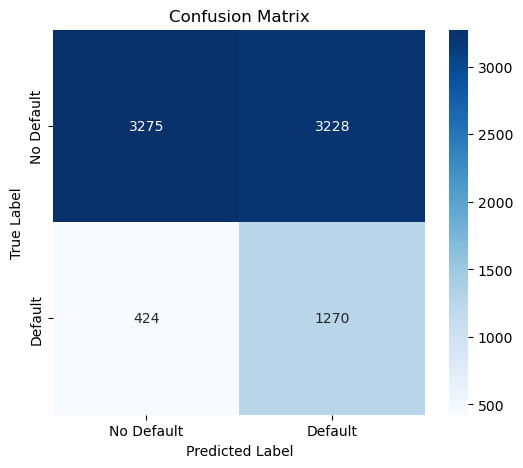

In [60]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

y_pred_proba = best_lr_pipe.predict_proba(X_test_clean)[:, 1]  
y_pred = best_lr_pipe.predict(X_test_clean)  


cm = confusion_matrix(y_test_clean, y_pred)

# confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

Sometime complex model doesn't neccessarily gives better test score, because it has so many hyperparameter for tunning and easily overfit the dataset. In terms of data, I spent much time in understanding description from kaggle and construct some new features based on existing features. However, in the SHAP plot, those features deson't contribute a lot in model prediction. I suspect it may due to some sort of multicollinearity issues. Also, I spent some time in setting grid search, those hyperparameter hunting are more like hide and seek game without a clearer algorithm. In fact, some simple linear model such as logstic regression can archive some satisfactory score.

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)